In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('Alkbh5_FL.pool.50nt.junc.3SS.summary.txt', sep='\s+', header=None)
dat.columns = ['tag_count', 'tag_size']
dat['prob'] = dat['tag_count'] / dat['tag_count'].sum() # calculate probability
dat['cum_prob'] = dat['prob'].cumsum() # calculate cumulative probability
dat = dat.sort_values('tag_size')

dat3 = pd.read_csv('Alkbh5_Cterminal.pool.50nt.junc.3SS.summary.txt', sep='\s+', header=None)
dat3.columns = ['tag_count', 'tag_size']
dat3['prob'] = dat3['tag_count'] / dat3['tag_count'].sum() # calculate probability
dat3['cum_prob'] = dat3['prob'].cumsum() # calculate cumulative probability
dat3 = dat3.sort_values('tag_size')

<ipython-input-4-141415bf8ba9>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  lns1 = ax1.plot(x_alkbh5, y_alkbh5_smooth, 'k', label='ALKBH5-FL binding region', c='red')
<ipython-input-4-141415bf8ba9>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  lns3 = ax1.plot(x_Cterminal, y_Cterminal_smooth, 'k', label='ALKBH5-C binding region', c='blue')


(0.0, 0.025)

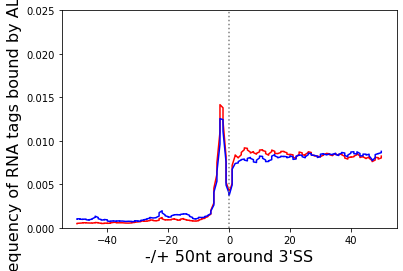

In [4]:
from scipy.ndimage import gaussian_filter1d

x_alkbh5 = dat['tag_size']
y_alkbh5 = dat['prob']
y_alkbh5_smooth = gaussian_filter1d(y_alkbh5, sigma=1)

x_Cterminal = dat3['tag_size']
y_Cterminal = dat3['prob']
y_Cterminal_smooth = gaussian_filter1d(y_Cterminal, sigma=1)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(x_alkbh5, y_alkbh5_smooth, 'k', label='ALKBH5-FL binding region', c='red')
lns3 = ax1.plot(x_Cterminal, y_Cterminal_smooth, 'k', label='ALKBH5-C binding region', c='blue')
ax1.set_xlabel("-/+ 50nt around 3'SS", fontsize=16)
ax1.set_ylabel('Frequency of RNA tags bound by ALKBH5', fontsize=16)
ax1.axvline(x = 0, color = 'grey', linestyle=':')
ax1.set_ylim([0, 0.025])



In [5]:
#save figure in high resolution PNG image

fig.set_size_inches(8, 6)
fig.savefig("CAJA_ALKBH5_FL_C_A3SS.jpg", dpi=300)
